<a href="https://colab.research.google.com/github/thedarsideofit/finance_python_practices/blob/main/datacamp_financial_trading_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course
https://campus.datacamp.com/courses/financial-trading-in-python

With some additionals ;)


## Chapter 1
# Financial time series data
Time series data: a sequence of data points indexed in time orde

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3MB 30.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=cad254ce072f67aab98cfb55b9920ca5ee37cbf087e2a01539bf342ee24b02ae
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf

temp = yf.Ticker(str('BTC-USD'))
stock_data = temp.history(period="max")  # Tells yfinance what kind of data we want about this stock (In this example, all of the historical data)
stock_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,61308396325,0,0
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907,0,0
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,96721152926,0,0
2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,55737497453,0,0
2021-05-15,50021.851562,50605.707031,47899.250000,49295.726562,55753342976,0,0


# Plot line chart of time series data

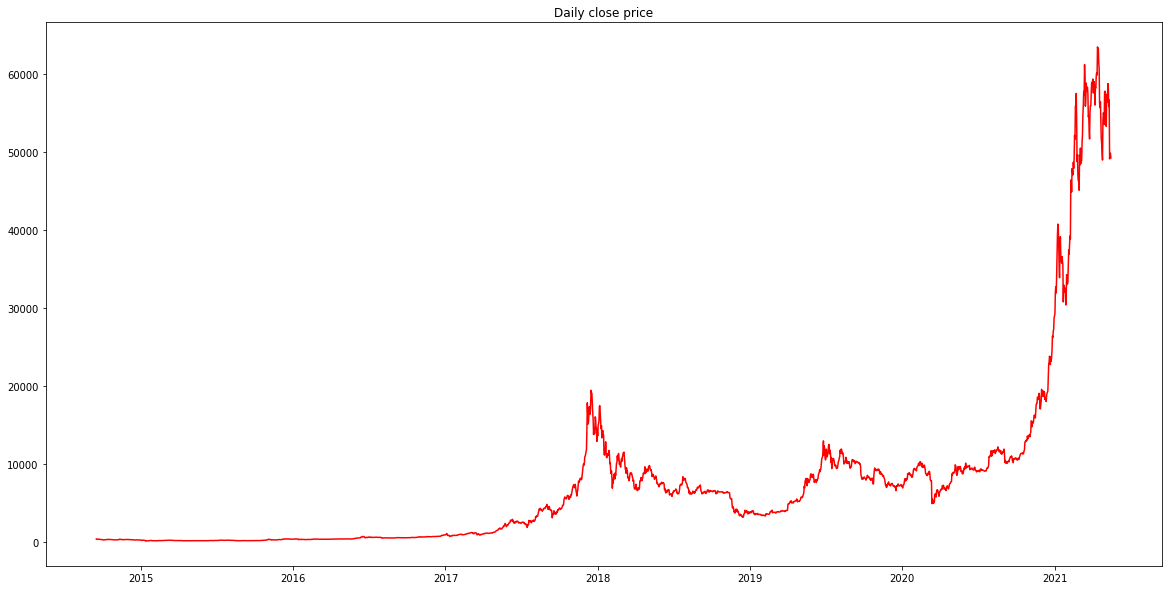

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(stock_data['Close'], color='red')
plt.title("Daily close price")
plt.show()

# Plot candlestick chart with Python

In [4]:
import plotly.graph_objects as go
# Define the candlestick
candlestick = go.Candlestick(x = stock_data.index,open = stock_data['Open'],high = stock_data['High'],low = stock_data['Low'],close = stock_data['Close'])
# Create a plot
fig = go.Figure(data=[candlestick])
# Show the plot
fig.show()

# Resample the data

In [5]:
# Resample from hourly to daily
stock_data_weekly = stock_data[['Close']].resample('W').mean()
stock_data_weekly.tail()

,Close
Date,
2021-04-18,61184.772879
2021-04-25,52573.490513
2021-05-02,55663.426897
2021-05-09,56963.835938
2021-05-16,51767.893229


# Calculate daily returns

In [6]:
# Calculate daily returns
stock_data['daily_return']= stock_data[['Close']].pct_change() * 100
stock_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return
Date,,,,,,,,
2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,61308396325,0,0,1.512317
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907,0,0,-13.321745
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,96721152926,0,0,1.150865
2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,55737497453,0,0,0.330564
2021-05-15,50021.851562,50605.707031,47899.250000,49295.726562,55753342976,0,0,-1.172418


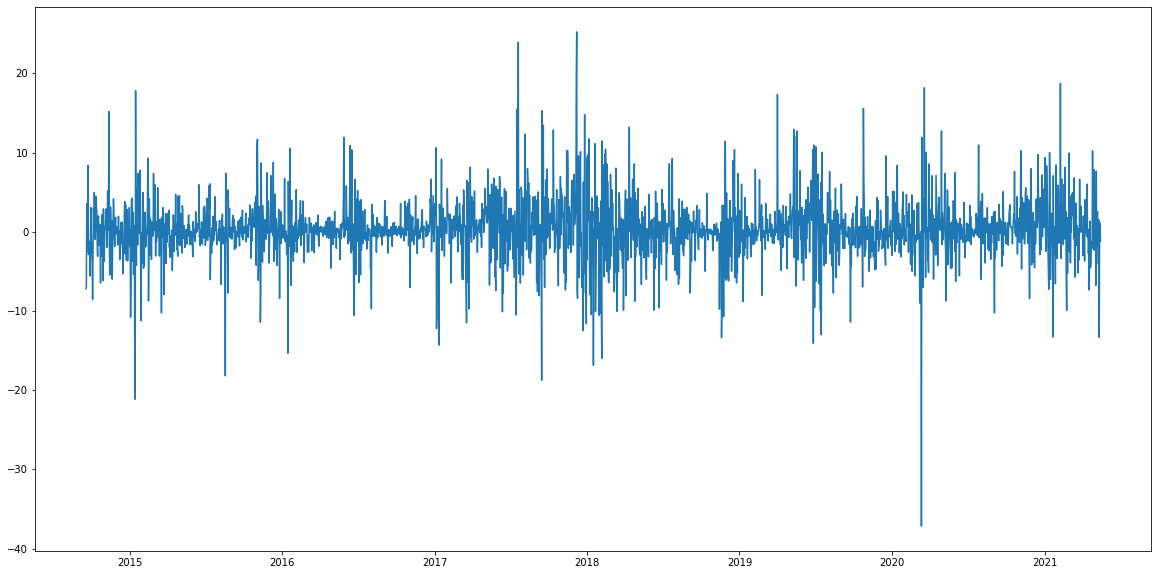

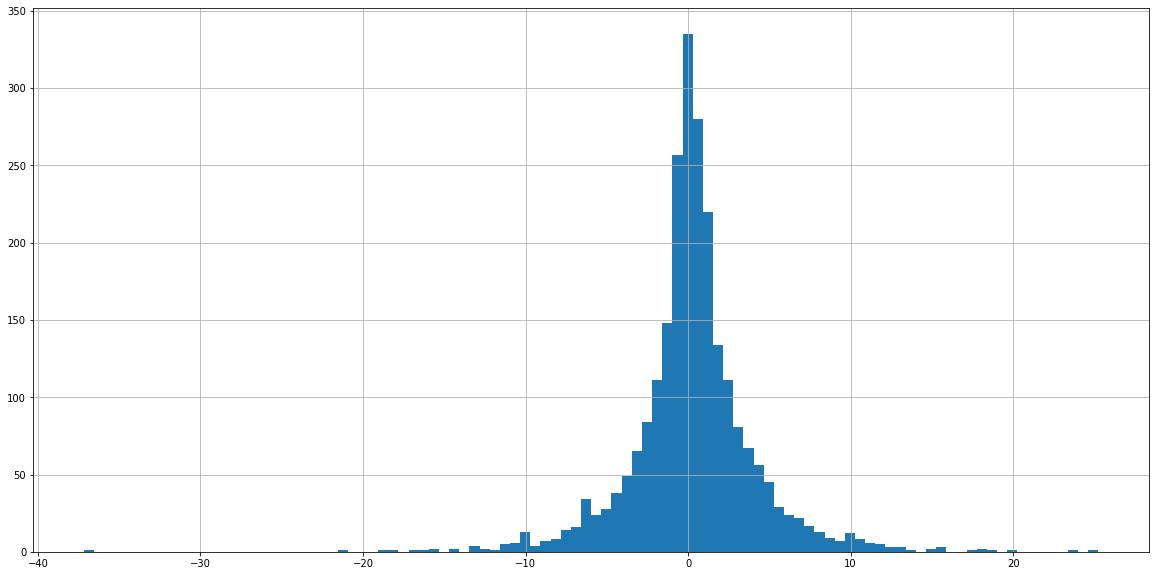

In [7]:
# Plot the data
plt.plot(stock_data['daily_return'])
plt.show()

stock_data['daily_return'].hist(bins=100)
plt.show()

# Calculate weekly returns

In [8]:
stock_data_weekly['weekly_return'] = stock_data_weekly[['Close']].pct_change() * 100
stock_data_weekly.tail()

,Close,weekly_return
Date,,
2021-04-18,61184.772879,4.495875
2021-04-25,52573.490513,-14.074225
2021-05-02,55663.426897,5.877366
2021-05-09,56963.835938,2.336200
2021-05-16,51767.893229,-9.121476


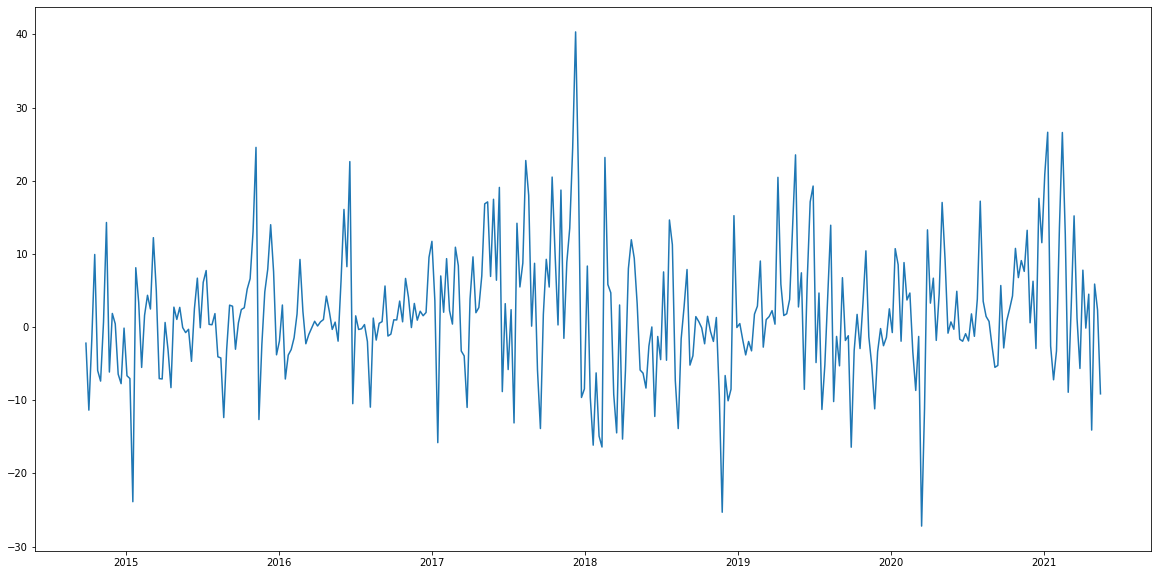

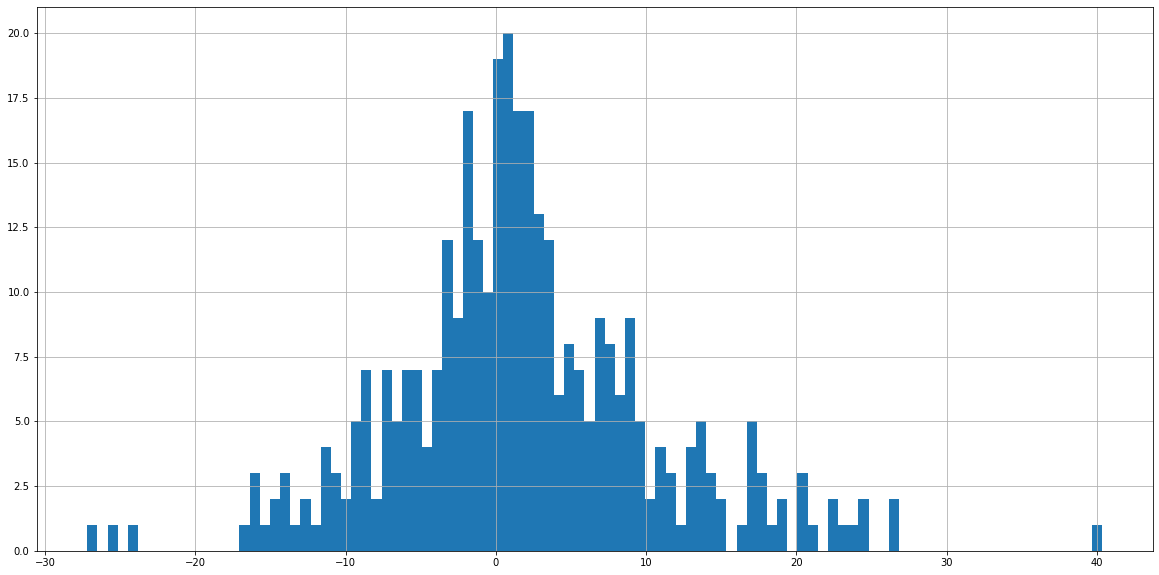

In [9]:
# Plot the data
plt.plot(stock_data_weekly['weekly_return'])
plt.show()

stock_data_weekly['weekly_return'].hist(bins=100)
plt.show()


# Data transformation
## Technical indicators: various types of data transformations
## Simple moving average (SMA): arithmetic mean price over a specied n-period

In [10]:
stock_data['sma_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,sma_50
Date,,,,,,,,,
2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,61308396325,0,0,1.512317,56876.752344
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907,0,0,-13.321745,56764.984141
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,96721152926,0,0,1.150865,56703.822656
2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,55737497453,0,0,0.330564,56667.350156
2021-05-15,50021.851562,50605.707031,47899.250000,49295.726562,55753342976,0,0,-1.172418,56550.518438


# Plot the rolling average

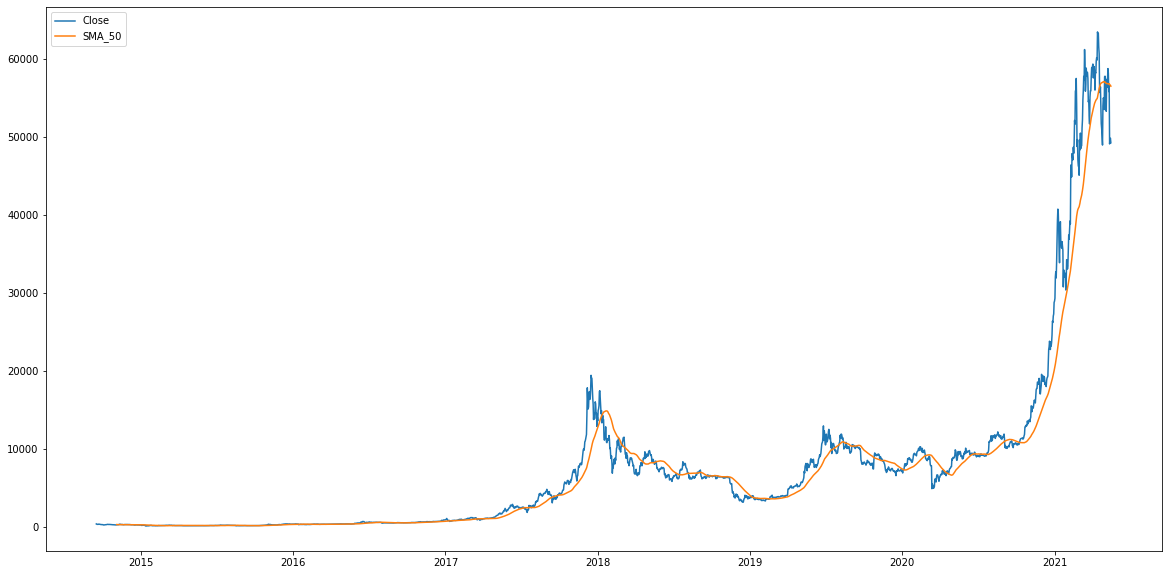

In [11]:
plt.plot(stock_data['Close'],label='Close')
plt.plot(stock_data['sma_50'],label='SMA_50')
plt.legend()
plt.show()

# The bt package

In [12]:
#BT package Practice
!pip install bt

     |████████████████████████████████| 2.7MB 29.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765272 sha256=3b5fcded2635d3b5fe4a0dbf2cf11239564795b63330e7744bc398ebb65a4d2d
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [16]:
import bt
bt_data_strategy_chips = bt.get('INTC,NVDA,QCOM,TXN', start='2021-4-1', end='2021-5-15')
bt_data_strategy_others = bt.get('BABA,BIDU,BRK-A,GOLD,NFLX,WMT', start='2021-4-1', end='2021-5-15')
print(bt_data_strategy_chips.head())


                 intc        nvda        qcom         txn
Date                                                     
2021-04-01  64.154869  552.469971  137.789993  191.005753
2021-04-05  66.132683  559.500000  140.330002  195.849014
2021-04-06  65.158676  554.460022  138.059998  193.521866
2021-04-07  65.844460  565.739990  139.429993  192.030090
2021-04-08  66.639565  572.679993  140.339996  194.128510


In [17]:
bt_strategy_chips = bt.Strategy('Trade_Weekly_Chips',
  [
    bt.algos.RunWeekly(), # Run weekly
    bt.algos.SelectAll(), # Use all data
    bt.algos.WeighEqually(), # Maintain equal weights
    bt.algos.Rebalance() # Rebalance
    ]
  ) 
# Create a backtest
bt_test_chips = bt.Backtest(bt_strategy_chips, bt_data_strategy_chips)

# Run the backtest
bt_res_chips = bt.run(bt_test_chips)

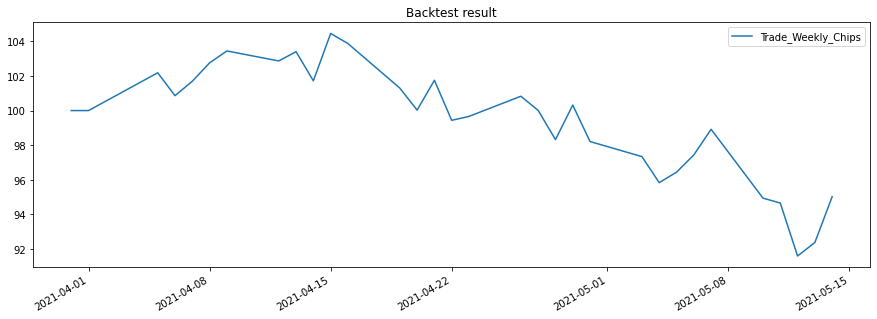

In [18]:
# Plot the result
%matplotlib inline
bt_res_chips.plot(title="Backtest result")


In [19]:
# Get trade details
bt_res_chips.get_transactions()

price  quantity
Date       Security                      
2021-04-01 intc       64.154869    3896.0
           nvda      552.469971     452.0
           qcom      137.789993    1814.0
           txn       191.005753    1308.0
2021-04-05 intc       66.132683     -34.0
           nvda      559.500000       4.0
           qcom      140.330002       6.0
           txn       195.849014      -4.0
2021-04-12 intc       65.009605      93.0
           nvda      608.359985     -34.0
           qcom      137.440002      51.0
           txn       191.373718      39.0
2021-04-19 intc       63.240498      49.0
           nvda      614.469971     -10.0
           qcom      135.250000       1.0
           txn       186.033188      18.0
2021-04-26 intc       58.400307     312.0
           nvda      619.119995      -5.0
           qcom      138.960007     -59.0
           txn       190.309586     -37.0
2021-05-03 intc       56.909489     -40.0
           nvda      593.469971       3.0
           qcom      137.429993     -43.0
           txn       178.800003      37.0
2021-05-10 intc       55.970001     -36.0
           nvda      570.630005       5.0
           qcom      128.940002      70.0
           txn       182.050003     -58.0

# OK and what about some stats?
https://pmorissette.github.io/bt/

In [20]:
bt_res_chips.display()

Stat                 Trade_Weekly_Chips
-------------------  --------------------
Start                2021-03-31
End                  2021-05-14
Risk-free rate       0.00%

Total Return         -4.98%
Daily Sharpe         -1.37
Daily Sortino        -2.17
CAGR                 -34.55%
Max Drawdown         -12.31%
Calmar Ratio         -2.81

MTD                  -3.25%
3m                   -
6m                   -
YTD                  -4.98%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  -34.55%

Daily Sharpe         -1.37
Daily Sortino        -2.17
Daily Mean (ann.)    -37.77%
Daily Vol (ann.)     27.59%
Daily Skew           -0.25
Daily Kurt           -0.53
Best Day             2.86%
Worst Day            -4.02%

Monthly Sharpe       -8.45
Monthly Sortino      -8.45
Monthly Mean (ann.)  -30.21%
Monthly Vol (ann.)   3.57%
Monthly Skew         -
Monthly Kurt         -
Best Month           -1.79%
Worst Month          -3.25%



# OK and how does the return distribution look like?

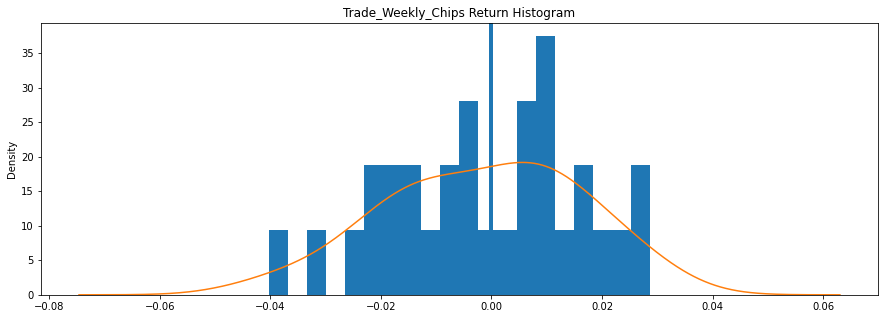

In [21]:
bt_res_chips.plot_histogram()

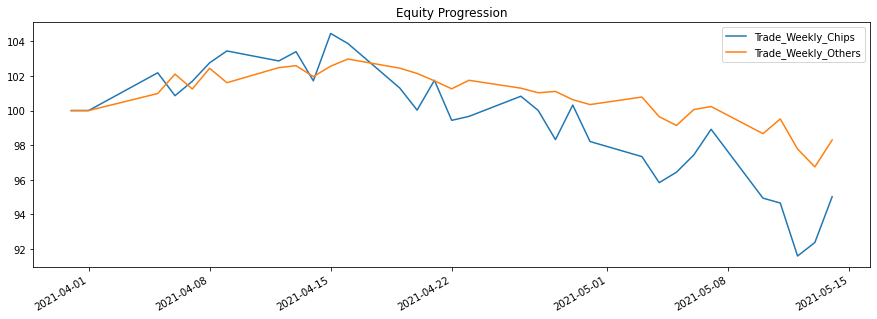

In [22]:
bt_strategy_others = bt.Strategy('Trade_Weekly_Others',
  [
    bt.algos.RunWeekly(), # Run weekly
    bt.algos.SelectAll(), # Use all data
    bt.algos.WeighEqually(), # Maintain equal weights
    bt.algos.Rebalance() # Rebalance
    ]
  ) 
# Create a backtest
bt_test_others = bt.Backtest(bt_strategy_others, bt_data_strategy_others)

# Run the backtest
bt_res_against = bt.run(bt_test_chips, bt_test_others)
bt_res_against.plot()

In [23]:
bt_res_against.display()

Stat                 Trade_Weekly_Chips    Trade_Weekly_Others
-------------------  --------------------  ---------------------
Start                2021-03-31            2021-03-31
End                  2021-05-14            2021-05-14
Risk-free rate       0.00%                 0.00%

Total Return         -4.98%                -1.70%
Daily Sharpe         -1.37                 -1.00
Daily Sortino        -2.17                 -1.71
CAGR                 -34.55%               -13.27%
Max Drawdown         -12.31%               -6.05%
Calmar Ratio         -2.81                 -2.19

MTD                  -3.25%                -2.04%
3m                   -                     -
6m                   -                     -
YTD                  -4.98%                -1.70%
1Y                   -                     -
3Y (ann.)            -                     -
5Y (ann.)            -                     -
10Y (ann.)           -                     -
Since Incep. (ann.)  -34.55%               -1

## Chapter 2
# The TA-Lib package

How to install TA-lib in google colab? https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab

In [24]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 28.4MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437989 sha256=8ef3f8905d8dcaecc43fef86e8548a44381c60555c50ee46533cbebaac7c7a7f
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


# Simple Moving Average (SMA)
SMA = (P + P + ... + P )/n

In [25]:
# Calculate two SMAs
stock_data['SMA_short'] = talib.SMA(stock_data['Close'], timeperiod=10)
stock_data['SMA_long'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Print the last five rows
print(stock_data.tail())

                    Open          High  ...     SMA_short      SMA_long
Date                                    ...                            
2021-05-11  55847.242188  56872.542969  ...  56794.230078  56876.752344
2021-05-12  56714.531250  57939.363281  ...  56046.175781  56764.984141
2021-05-13  49735.433594  51330.843750  ...  55297.765625  56703.822656
2021-05-14  49682.980469  51438.117188  ...  54952.465234  56667.350156
2021-05-15  50021.851562  50605.707031  ...  54139.637109  56550.518438

[5 rows x 11 columns]


# Plotting the SMA

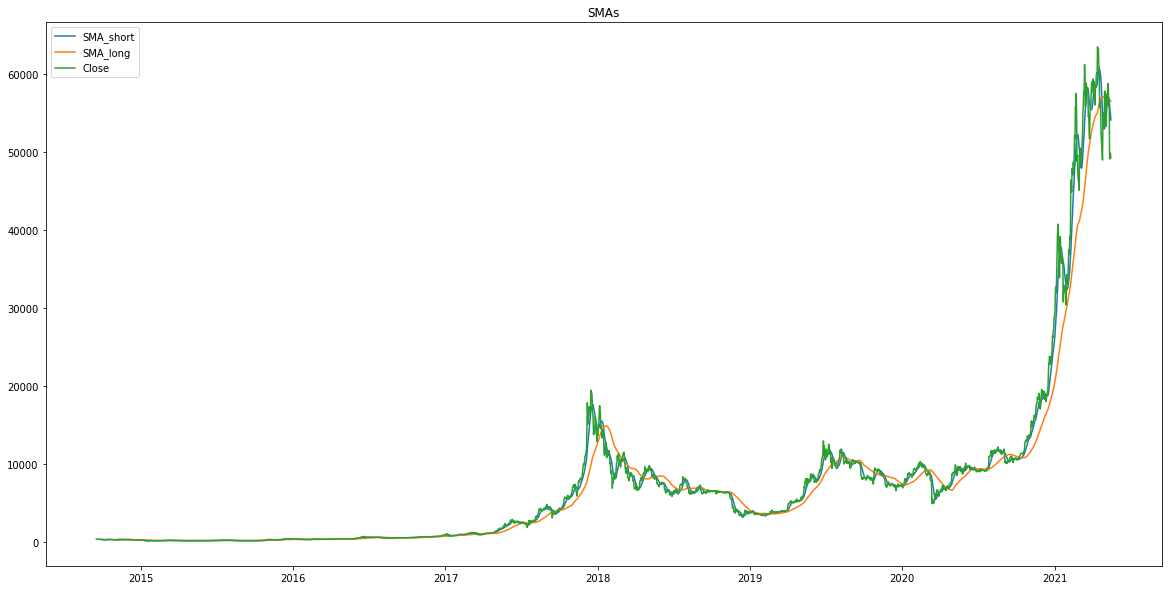

In [27]:

# Plot SMA with the price
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(stock_data['SMA_short'],label='SMA_short')
plt.plot(stock_data['SMA_long'],label='SMA_long')
plt.plot(stock_data['Close'],label='Close')
# Customize and show the plot
plt.legend()
plt.title('SMAs')
plt.show()

# Exponential Moving Average (EMA)
EMA = P × multiplier + previous EMA × (1 − multiplier)
multiplier = 2/(n + 1)


In [28]:
# Calculate two EMAs
stock_data['EMA_short'] = talib.EMA(stock_data['Close'], timeperiod=10)
stock_data['EMA_long'] = talib.EMA(stock_data['Close'], timeperiod=50)
# Print the last five rows
print(stock_data.tail())

                    Open          High  ...     EMA_short      EMA_long
Date                                    ...                            
2021-05-11  55847.242188  56872.542969  ...  56718.098780  55692.663561
2021-05-12  56714.531250  57939.363281  ...  55342.178121  55436.109506
2021-05-13  49735.433594  51330.843750  ...  54319.271445  55211.798992
2021-05-14  49682.980469  51438.117188  ...  53512.228484  55002.729822
2021-05-15  50021.851562  50605.707031  ...  52745.591771  54778.925772

[5 rows x 13 columns]


# Plotting the EMA

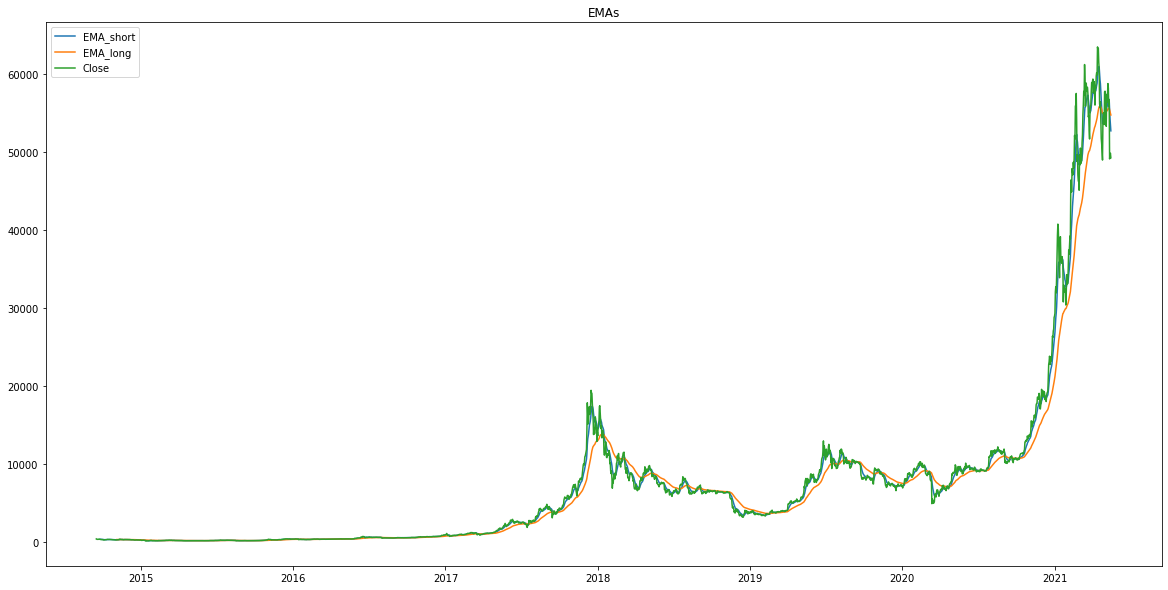

In [29]:
# Plot EMA with the price
plt.plot(stock_data['EMA_short'],label='EMA_short')
plt.plot(stock_data['EMA_long'],label='EMA_long')
plt.plot(stock_data['Close'],label='Close')
# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

# SMA vs. EMA
EMA is more sensitive to the most recent price movement

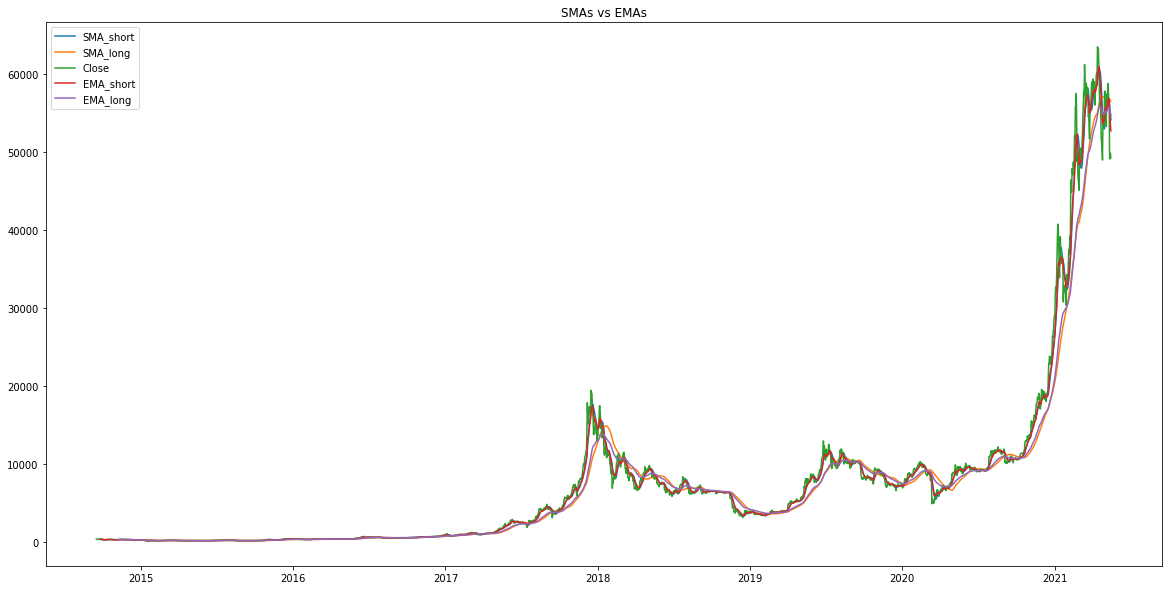

In [30]:
# Plot SMA
plt.plot(stock_data['SMA_short'],label='SMA_short')
plt.plot(stock_data['SMA_long'],label='SMA_long')
plt.plot(stock_data['Close'],label='Close')
# Plot EMA
plt.plot(stock_data['EMA_short'],label='EMA_short')
plt.plot(stock_data['EMA_long'],label='EMA_long')
# Customize and show the plot
plt.legend()
plt.title('SMAs vs EMAs')
plt.show()

# Strength indicator: **ADX**
How is ADX calculated?
Derived from the smoothed averages of the difference between +DI and -DI


*   +DI (Plus Directional Index): quantify the presence of an uptrend
*   -DI (Minus Directional Index): quantify the presence of a downtrend



In [32]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'],timeperiod=14)

# Print the last five rows
print(stock_data.tail())

                    Open          High  ...      EMA_long        ADX
Date                                    ...                         
2021-05-11  55847.242188  56872.542969  ...  55692.663561  16.348403
2021-05-12  56714.531250  57939.363281  ...  55436.109506  17.934587
2021-05-13  49735.433594  51330.843750  ...  55211.798992  19.835686
2021-05-14  49682.980469  51438.117188  ...  55002.729822  21.547652
2021-05-15  50021.851562  50605.707031  ...  54778.925772  23.329471

[5 rows x 14 columns]


## Plotting ADX

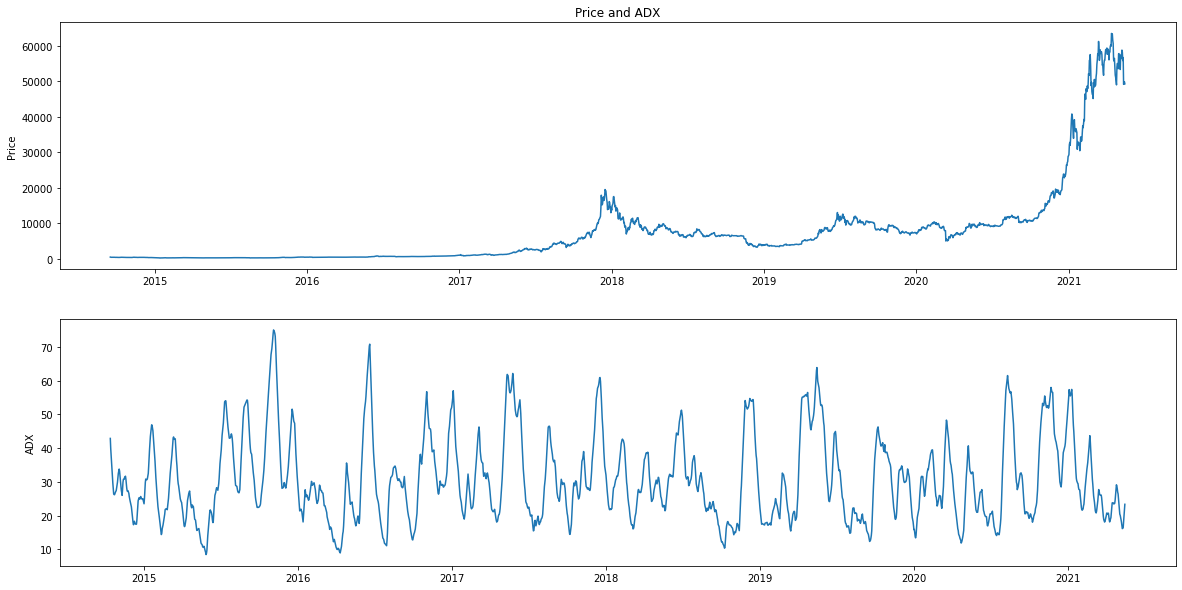

In [33]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'])
ax1.set_title('Price and ADX')
plt.show()

# Momentum indicator: RSI
## Measures the momentum of a trend


*   Oscillates between 0 and 100
*   RSI > 70: Overbought
*   RSI < 30: Oversold



### How is RSI calculated?
RSI = 100 − 100/(1 + RS)
RS = average of upward price changes / average of downward price changes

In [34]:
# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
# Print the last five rows
print(stock_data.tail())


                    Open          High  ...        ADX        RSI
Date                                    ...                      
2021-05-11  55847.242188  56872.542969  ...  16.348403  50.716592
2021-05-12  56714.531250  57939.363281  ...  17.934587  37.129039
2021-05-13  49735.433594  51330.843750  ...  19.835686  38.458625
2021-05-14  49682.980469  51438.117188  ...  21.547652  38.863158
2021-05-15  50021.851562  50605.707031  ...  23.329471  37.908240

[5 rows x 15 columns]


## Plotting RSI

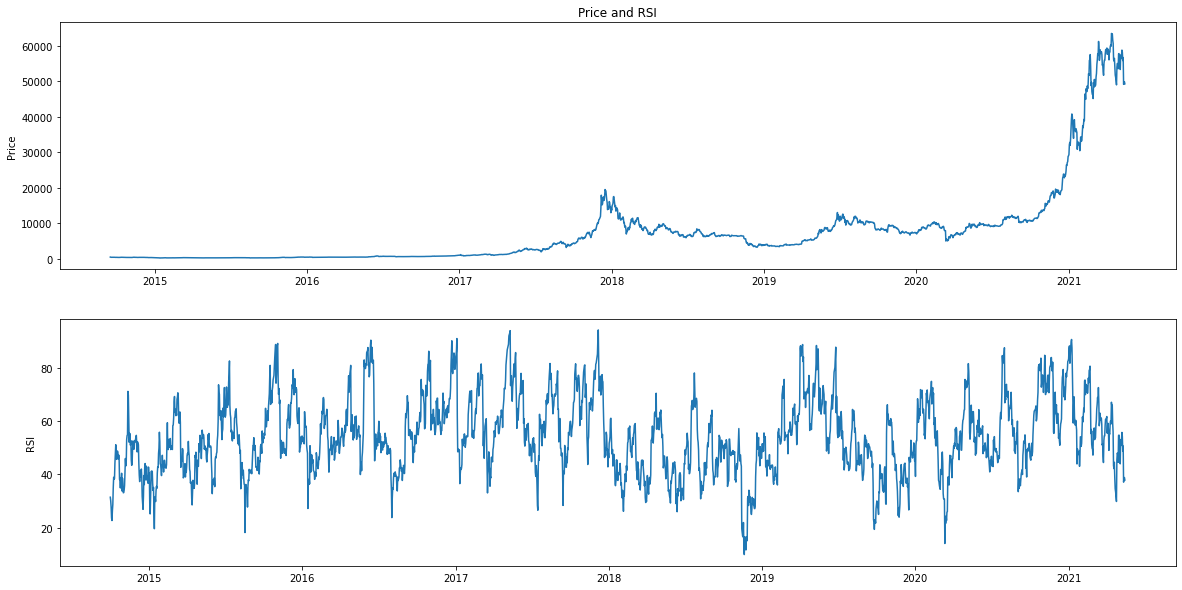

In [36]:
import matplotlib.pyplot as plt
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'])
ax1.set_title('Price and RSI')
plt.show()

## Volatility indicator: Bollinger Bands


*  Measure price volatility
*   Composed of three lines:

> * Middle band: n-period simple moving average
> * Upper band: k-standard deviations above the middle band
> * Lower band: k-standard deviations belowthe middle band

* The wider the bands, the more volatile the asset prices
* Measure whether a price is too high or too low on a relative basis:

> * Relatively high: price close to the upper band
> * Relatively low: price close to the lower band



In [37]:
# Define the Bollinger Bands
upper, mid, lower = talib.BBANDS(stock_data['Close'],nbdevup=2,nbdevdn=2,timeperiod=20)

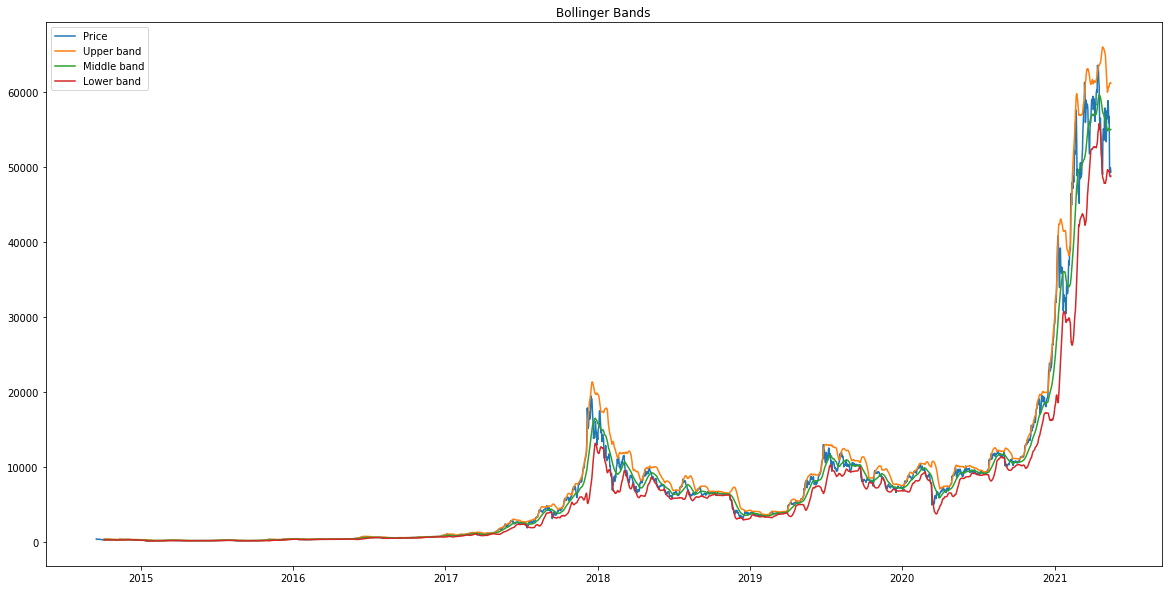

In [38]:
# Plot the Bollinger Bands
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()